# <div style="text-align: center"> **Interactive plots pf Monte Carlo of CPPI and GBM** </div>
---

In [1]:
import ipywidgets as widgets 
from IPython.display import display
import pandas as pd
import edhec_risk_ins as eri

%load_ext autoreload
%autoreload 2

## GBM Interactive Plots
---

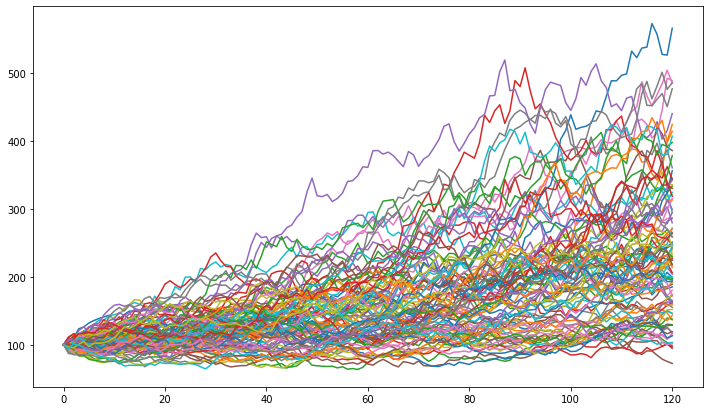

In [2]:
eri.gbm(10,100, mu=0.1).plot(figsize=(12,7),legend=False)
# static plot: when you want to change the parameters you have to do it manually

In [3]:
def show_gbm(n_scenarios,mu,sigma):
    """
    Draw the results of a stock price evolution under a Geometric Brownian Motion model
    """
    s_0 = 100
    prices=eri.gbm(n_scenarios=n_scenarios,mu=mu,sigma=sigma,s_0=s_0)
    ax= prices.plot(legend=False,color="indianred",alpha=0.5,linewidth=2,figsize=(12,7))
    ax.axhline(y=s_0,ls=":",color="black")
    ax.set_ylim(top=400)
    #draw a dot at the origin
    ax.plot(0,s_0,marker='o',color='darkred',alpha=0.2)

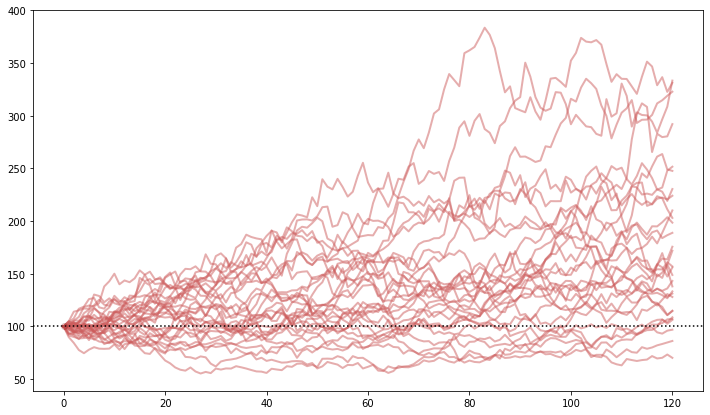

In [4]:
show_gbm(30,0.07,0.15)

In [5]:
gbm_controls = widgets.interactive(show_gbm,
                                   n_scenarios=(1,20,1),
                                   mu=(-0.2,0.2,0.01),
                                  sigma=(0,0.3,0.01)
                                  )

In [6]:
display(gbm_controls)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

## Interactive CPPI Simulation - Monte Carlo

In [7]:
%load_ext autoreload
%autoreload 2
def show_cppi(n_scenarios=50,mu=0.07,sigma=0.15,m=3,floor=0., riskfree_rate=0.03,y_max=100):
    """
    plot the results of a monte carlo simulation of CPPI
    """
    start = 100
    sim_rets = eri.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices = False, steps_per_year=12) # take the GBM generating rets as risky assets returns
    risky_r = pd.DataFrame(sim_rets)
    # run the back test
    btr = eri.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["wealth"]
    y_max = wealth.values.max()*y_max/100 #scale with y_max
    ax = wealth.plot(legend=False,alpha=0.3,color="indianred",figsize=(12,7))
    ax.axhline(y=start,ls=":",color="black")
    ax.axhline(y=start*floor,ls="--",color="red")
    ax.set_ylim(top=y_max) # set the y limit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1,max=1000,step=5,value=50),
                                    mu=(0.,+.2,.01),
                                    sigma=(0, .30, .05),
                                    floor=(0, 2, .1),
                                    m=(1, 5, .5),
                                    riskfree_rate=(0, .05, .01),
                                    y_max=widgets.IntSlider(min=0,max=100,step=1,value=100,
                                                           description="Zoom Y Axis")
                                    
)
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [9]:
# when the m and sigmaa are set high enough, there start to be violations taht break down the floor

In [10]:
import matplotlib.pyplot as plt

In [11]:
def show_cppi(n_scenarios=50,mu=0.07,sigma=0.15,m=3,floor=0., riskfree_rate=0.03,y_max=100):
    """
    plot the results of a monte carlo simulation of CPPI
    """
    start = 100
    sim_rets = eri.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices = False, steps_per_year=12) # take the GBM generating rets as risky assets returns
    risky_r = pd.DataFrame(sim_rets)
    # run the back test
    btr = eri.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["wealth"]
    y_max = wealth.values.max()*y_max/100 #scale with y_max
    terminal_wealth = wealth.iloc[-1]
    #plot!
    fig, (wealth_ax,hist_ax) = plt.subplots(nrows=1,ncols=2,sharey=True,gridspec_kw={'width_ratios':[3,2]},figsize=(24,9)) #sharey means the twe plots share y axis
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3,color="indianred", figsize=(12,7))
    wealth_ax.axhline(y=start,ls=":",color="black")
    wealth_ax.axhline(y=start*floor,ls="--",color="red")
    wealth_ax.set_ylim(top=y_max) # set the y limit
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w',fc='indianred',orientation='horizontal')
    hist_ax.axhline(y=start,ls=":", color="black")
    
cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1,max=1000,step=5,value=50),
                                    mu=(0.,+.2,.01),
                                    sigma=(0, .30, .05),
                                    floor=(0, 2, .1),
                                    m=(1, 5, .5),
                                    riskfree_rate=(0, .05, .01),
                                    y_max=widgets.IntSlider(min=0,max=100,step=1,value=100,
                                                           description="Zoom Y Axis")
                                    
)
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def show_cppi(n_scenarios=50,mu=0.07,sigma=0.15,m=3,floor=0., riskfree_rate=0.03,y_max=100):
    """
    plot the results of a monte carlo simulation of CPPI
    """
    start = 100
    sim_rets = eri.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices = False, steps_per_year=12) # take the GBM generating rets as risky assets returns
    risky_r = pd.DataFrame(sim_rets)
    # run the back test
    btr = eri.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["wealth"]
    
    #calculate terminal wealth stats
    y_max = wealth.values.max()*y_max/100 #scale with y_max
    terminal_wealth = wealth.iloc[-1] #last row of wealth
    
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor) # mask is an array of booleans(trues or falses)
    # when termianl value is less than start*floor, it will be true which means a violation in this case
    n_failures = failure_mask.sum() #sum all the tures
    p_fail = n_failures/n_scenarios
    
    e_shortfall = np.dot(terminal_wealth-start*floor,failure_mask)/n_failures if n_failures > 0 else 0.0 
    #plot!
    fig, (wealth_ax,hist_ax) = plt.subplots(nrows=1,ncols=2,sharey=True,gridspec_kw={'width_ratios':[3,2]},figsize=(24,9)) #sharey means the twe plots share y axis
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3,color="indianred", figsize=(12,7))
    wealth_ax.axhline(y=start,ls=":",color="black")
    wealth_ax.axhline(y=start*floor,ls="--",color="red")
    wealth_ax.set_ylim(top=y_max) # set the y limit
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w',fc='indianred',orientation='horizontal')
    hist_ax.axhline(y=start,ls=":", color="black")
    hist_ax.axhline(y=tw_mean,ls=":",color="blue")
    hist_ax.axhline(y=tw_median,ls=":",color="purple")
    hist_ax.annotate(f"Mean:${int(tw_mean)}", xy=(.7,.9),xycoords='axes fraction',fontsize=24)
    hist_ax.annotate(f"Median:${int(tw_median)}",xy=(.7,.85), xycoords='axes fraction',fontsize=24)
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(f"Violations: {n_failures}({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}",xy=(.7,.7),xycoords='axes fraction',fontsize=24)      
    
cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1,max=1000,step=5,value=50),
                                    mu=(0.,+.2,.01),
                                    sigma=(0, .50, .05),
                                    floor=(0, 2, .1),
                                    m=(1, 5, .5),
                                    riskfree_rate=(0, .05, .01),
                                    steps_per_year=widgets.IntSlider(min=1,max=12,step=1,value=12,
                                                                    description="Rebals/Year"),
                                    y_max=widgets.IntSlider(min=0,max=100,step=1,value=100,
                                                           description="Zoom Y Axis")
                                    
)
display(cppi_controls)    

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [ ]:
## Exercise: Efficient Frontier to see the change as the parameters change